In [1]:
!pip install -q -U watermark


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
%reload_ext watermark
%watermark -a "Juliana Santimaria"

Author: Juliana Santimaria



In [4]:
dados = pd.read_csv("resultado_projeto7.csv")

In [5]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_emergency,number_inpatient,number_diagnoses,metformin-rosiglitazone,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,0,9,No,1,1,1,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,0,1,6,No,0,1,0,1,0,1
2,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,0,7,No,1,1,0,3,1,1
3,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,0,5,No,1,1,0,1,0,2
4,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,0,9,No,0,1,1,3,0,1


In [6]:
dados.shape

(70413, 23)

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70413 entries, 0 to 70412
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              70413 non-null  int64 
 1   patient_nbr               70413 non-null  int64 
 2   race                      70413 non-null  object
 3   gender                    70413 non-null  int64 
 4   age                       70413 non-null  object
 5   admission_type_id         70413 non-null  object
 6   discharge_disposition_id  70413 non-null  object
 7   admission_source_id       70413 non-null  object
 8   time_in_hospital          70413 non-null  int64 
 9   num_lab_procedures        70413 non-null  int64 
 10  num_procedures            70413 non-null  int64 
 11  num_medications           70413 non-null  int64 
 12  number_outpatient         70413 non-null  int64 
 13  number_emergency          70413 non-null  int64 
 14  number_inpatient      

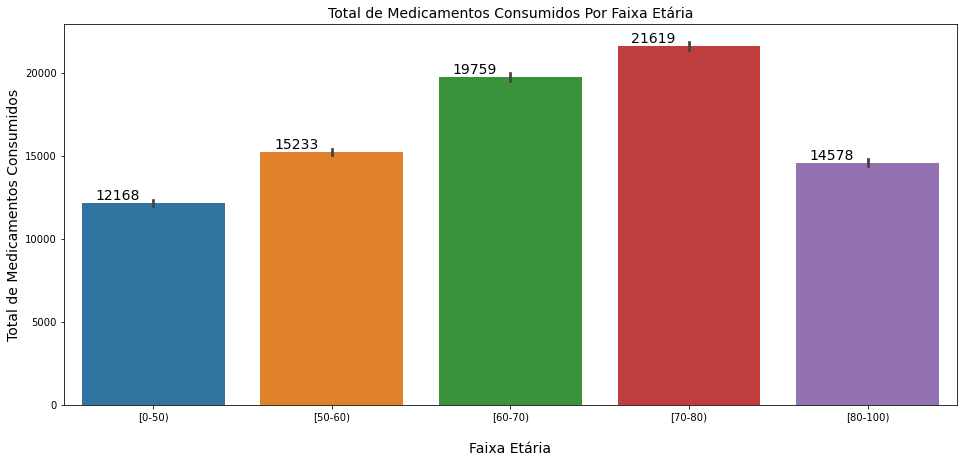

In [8]:
plt.figure(figsize = (16,7))

figx = sns.barplot(x = 'age', y = 'num_med', estimator = np.sum, data = dados)

plt.xlabel("\nFaixa Etária", fontsize = 14, color = 'black')

plt.ylabel("Total de Medicamentos Consumidos", fontsize = 14, color = 'black')

plt.title("Total de Medicamentos Consumidos Por Faixa Etária", fontsize = 14, color = 'black')

for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')

plt.show()

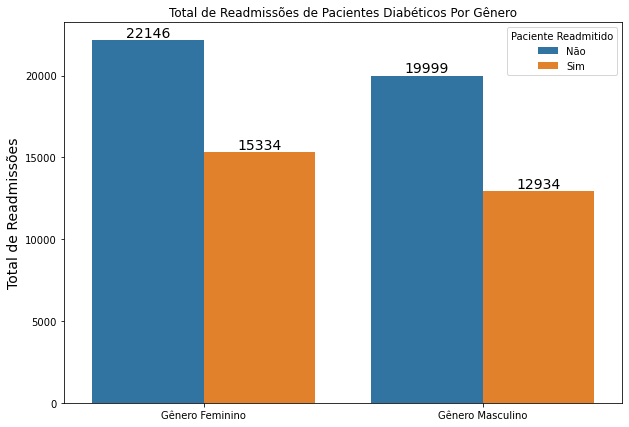

In [9]:
figx = sns.countplot(x = [('Gênero Feminino' if x == 0 else 'Gênero Masculino') for x in dados['gender']], 
                     hue = 'readmitted', 
                     data = dados) 

figx.figure.set_size_inches(10,7)

figx.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

figx.axes.set_title('Total de Readmissões de Pacientes Diabéticos Por Gênero')

for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')

plt.show()

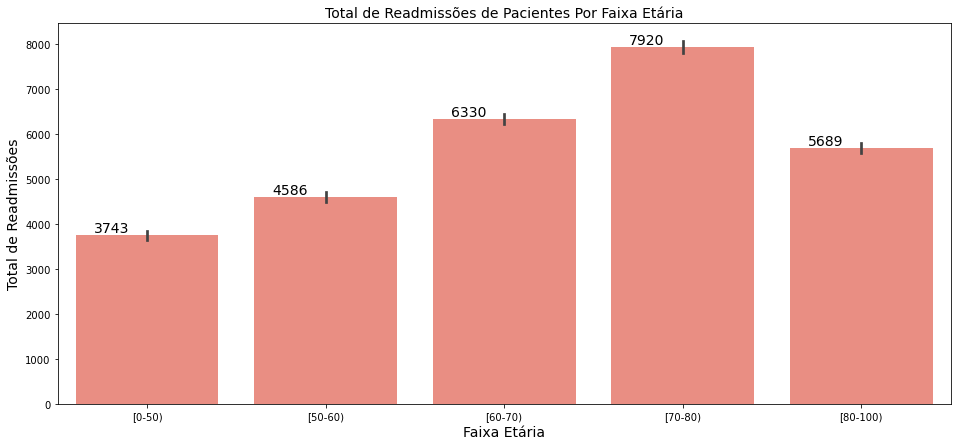

In [10]:
plt.figure(figsize = (16,7))

figx = sns.barplot(x = 'age', y = 'readmitted', estimator = np.sum, data = dados, color = 'salmon')

plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

plt.title("Total de Readmissões de Pacientes Por Faixa Etária", fontsize = 14, color = 'black')

for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')

plt.show()

In [11]:
percentual_idade_readmissao = pd.crosstab(dados.age , dados.readmitted, margins = True, normalize = 'index') * 100
percentual_idade_readmissao

readmitted,0,1
age,,
[0-50),65.216987,34.783013
[50-60),62.724539,37.275461
[60-70),59.992416,40.007584
[70-80),56.233422,43.766578
[80-100),57.642767,42.357233
All,59.854004,40.145996


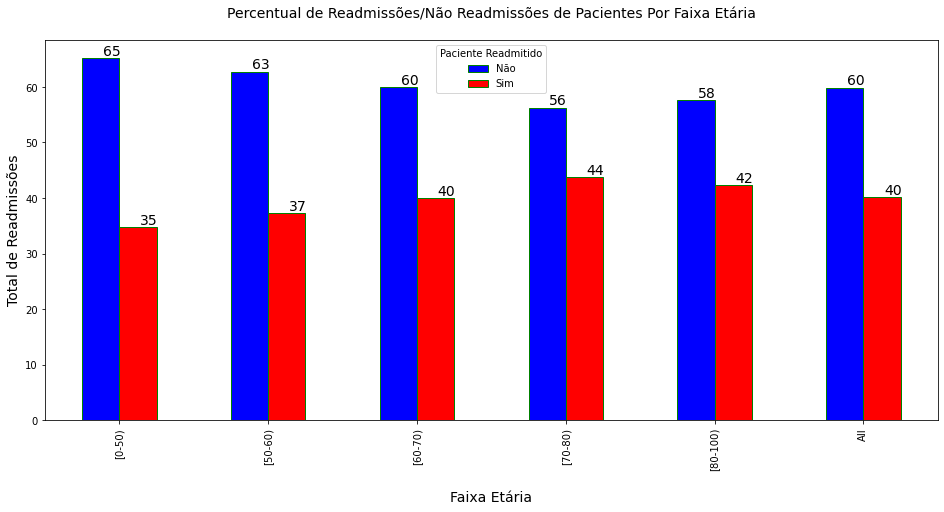

In [12]:
fig = percentual_idade_readmissao.plot(kind = 'bar', 
                                       figsize = (16, 7), 
                                       width = 0.5,
                                       edgecolor = 'g', 
                                       color = ['b', 'r'])

plt.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

plt.xlabel("\nFaixa Etária", fontsize = 14, color = 'black')

plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

plt.title("Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária\n", fontsize = 14)

for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.2, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

plt.show()

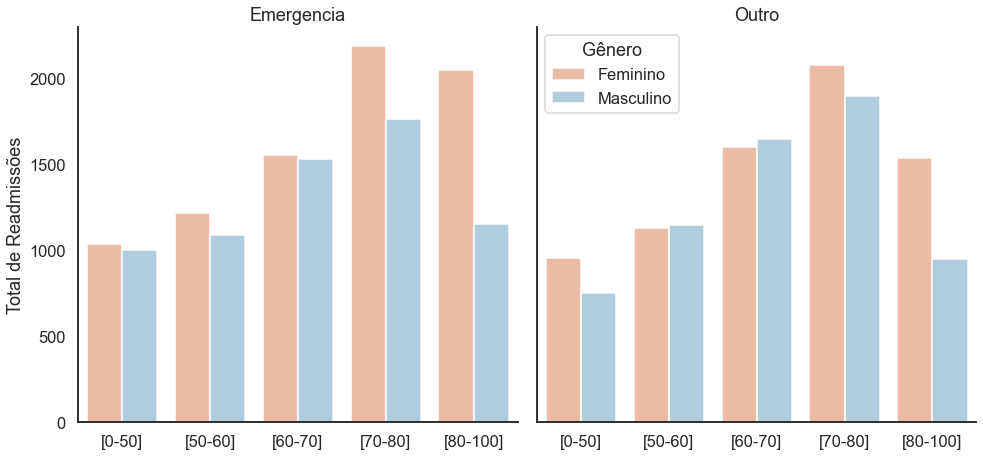

In [13]:
sns.set(style = "white", context = "talk")

g = sns.catplot(x = 'age', 
                y = 'readmitted', 
                hue = 'gender', 
                col = 'admission_type_id',
                estimator = np.sum, 
                data = dados, 
                palette = "RdBu", 
                kind = "bar",
                height = 7, 
                aspect = 1,
                legend = False,
                ci = None)

(g.set_axis_labels("", "Total de Readmissões")
 .set_xticklabels(["[0-50]", "[50-60]", "[60-70]", "[70-80]", "[80-100]"])
 .set_titles("{col_name}"))

plt.legend(title = 'Gênero', loc = 'upper left', labels = ['Feminino', 'Masculino'])

plt.show(g)

In [14]:
df_temp = dados

In [15]:
df_temp["readmitted"] = df_temp["readmitted"].map({0: "Não Readmitido", 1: "Readmitido"})

In [16]:
df_temp.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_emergency,number_inpatient,number_diagnoses,metformin-rosiglitazone,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,0,9,No,1,1,Readmitido,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,0,1,6,No,0,1,Não Readmitido,1,0,1
2,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,0,7,No,1,1,Não Readmitido,3,1,1
3,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,0,5,No,1,1,Não Readmitido,1,0,2
4,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,0,9,No,0,1,Readmitido,3,0,1


<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->

In [17]:
num_visitas_comorbidade = pd.crosstab(dados.number_inpatient, dados.comorbidade).sum()
num_visitas_comorbidade

comorbidade
0    15666
1    13258
2    27937
3    13552
dtype: int64

In [18]:
type(num_visitas_comorbidade)

pandas.core.series.Series

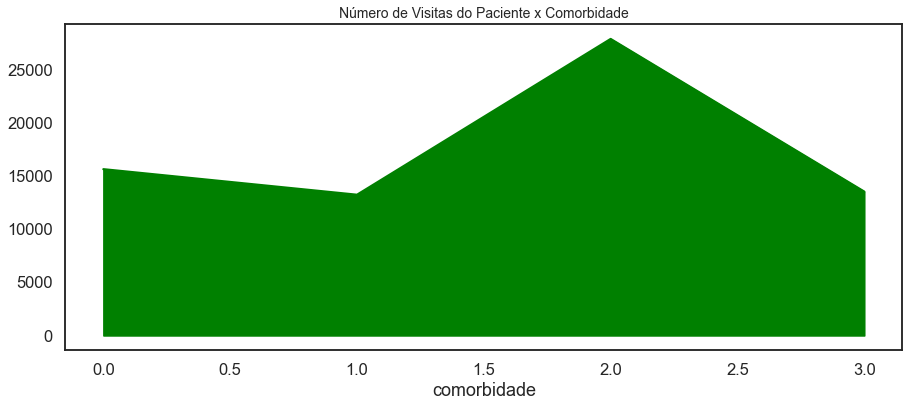

In [19]:
fig = num_visitas_comorbidade.plot(kind = 'area',
                                   figsize = (15,6),
                                   color = 'Green')

for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.2, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

plt.title("Número de Visitas do Paciente x Comorbidade", fontsize = 14)
plt.show()

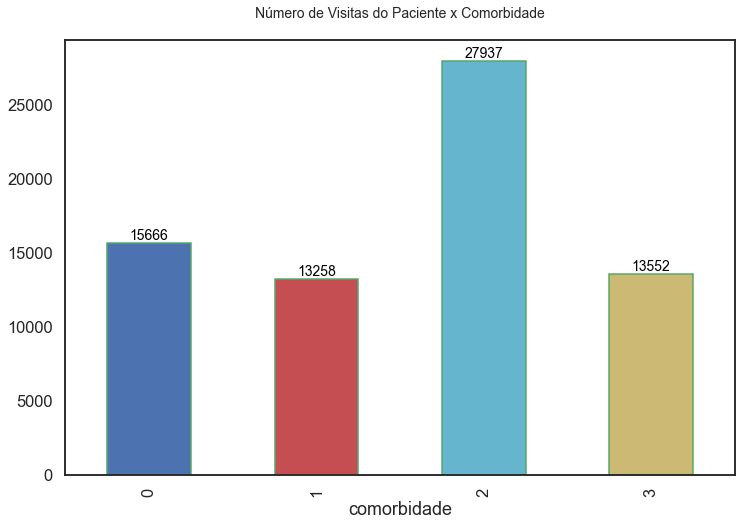

In [20]:
sns.set(style = "white", context = "talk")

fig = num_visitas_comorbidade.plot(kind = 'bar',
                                   figsize = (12,8), 
                                   width = 0.5,
                                   edgecolor = 'g', 
                                   color = ['b','r','c','y'],
                                   rot = 90)

for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.25, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

plt.title("Número de Visitas do Paciente x Comorbidade\n", fontsize = 14)

plt.show()

In [21]:
percent_visitas_readm = pd.crosstab(dados.number_inpatient , dados.readmitted, normalize = 'index') * 100
percent_visitas_readm

readmitted,Não Readmitido,Readmitido
number_inpatient,,
0,62.364479,37.635521
1,45.948633,54.051367
2,34.578236,65.421764
3,29.531568,70.468432
4,24.152542,75.847458
5,20.588235,79.411765
6,12.500000,87.500000
7,10.000000,90.000000
8,15.384615,84.615385


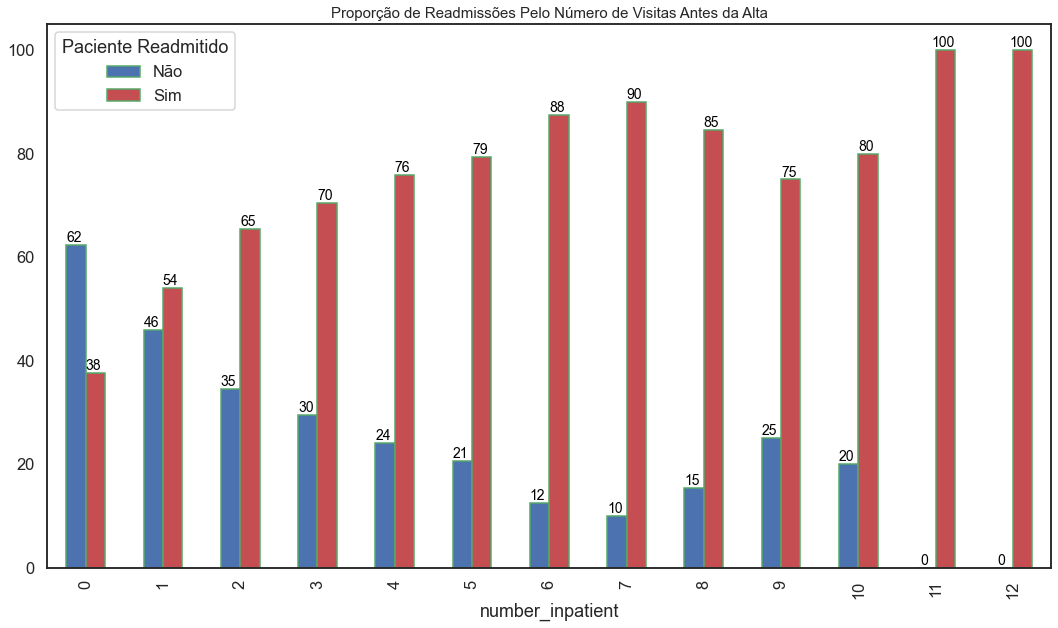

In [22]:
fig = percent_visitas_readm.plot(kind = 'bar', 
                                 figsize = (18,10), 
                                 width = 0.5, 
                                 edgecolor = 'g', 
                                 color = ['b','r'])

for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.1, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

plt.title("Proporção de Readmissões Pelo Número de Visitas Antes da Alta", fontsize = 15)

fig.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

plt.show()

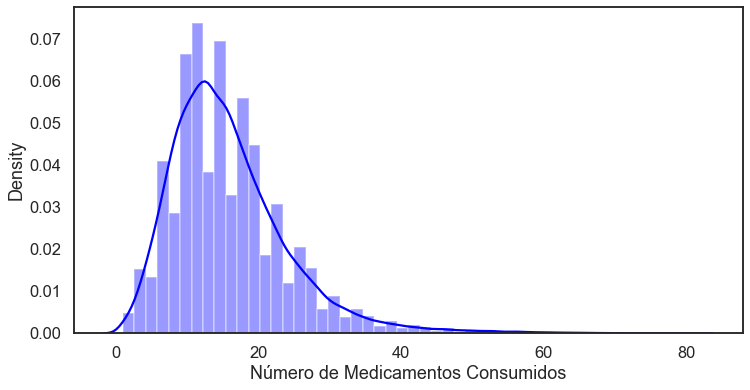

In [23]:
plt.figure(figsize = (12,6))

sns.distplot(dados['num_medications'], 
             hist = True, 
             color = 'Blue', 
             axlabel = "Número de Medicamentos Consumidos");

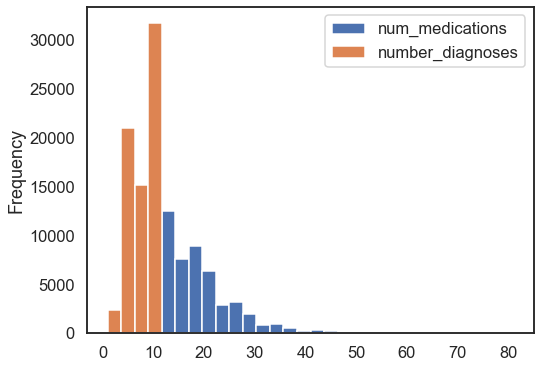

In [24]:
dados[["num_medications", "number_diagnoses"]].plot(bins = 30, kind = "hist", figsize = (8,6));

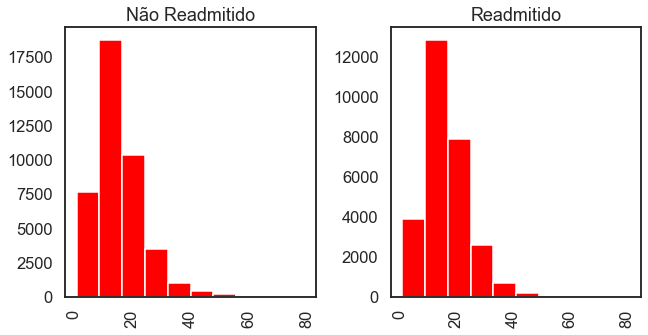

In [25]:
dados[["num_medications"]].hist(by = dados.readmitted, figsize = (10,5), color = 'Red');

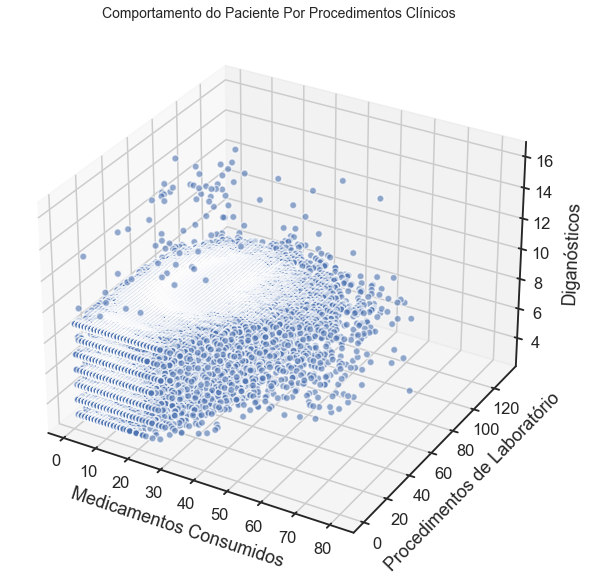

In [26]:
fig = plt.figure(figsize = (14, 10))

ax = fig.add_subplot(111, projection = '3d')

xs = dados['num_medications']
ys = dados['num_lab_procedures']
zs = dados['number_diagnoses']

ax.scatter(xs, ys, zs, s = 50, alpha = 0.6, edgecolors = 'w')

ax.set_xlabel('\nMedicamentos Consumidos')
ax.set_ylabel('\nProcedimentos de Laboratório')
ax.set_zlabel('\nDiganósticos')

plt.title("Comportamento do Paciente Por Procedimentos Clínicos", fontsize = 14)

plt.show()

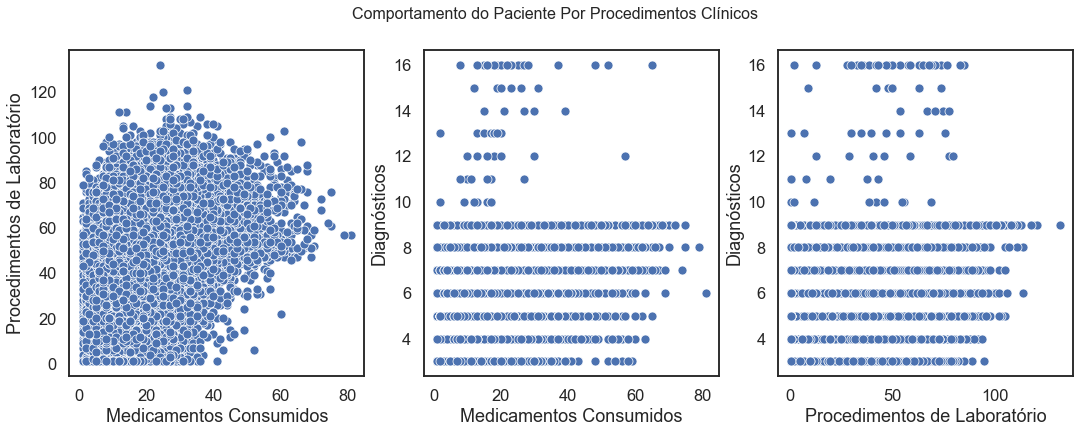

In [27]:
fig, axs = plt.subplots(1, 3, figsize = (18, 6))

sns.scatterplot(x = dados['num_medications'], y = dados['num_lab_procedures'], data = dados, ax = axs[0])
axs[0].set_xlabel('Medicamentos Consumidos')
axs[0].set_ylabel('Procedimentos de Laboratório')

sns.scatterplot(x = dados['num_medications'], y = dados['number_diagnoses'], data = dados, ax = axs[1])
axs[1].set_xlabel('Medicamentos Consumidos')
axs[1].set_ylabel('Diagnósticos')

sns.scatterplot(x = dados['num_lab_procedures'], y = dados['number_diagnoses'], data = dados, ax = axs[2])
axs[2].set_xlabel('Procedimentos de Laboratório')
axs[2].set_ylabel('Diagnósticos')

plt.suptitle("Comportamento do Paciente Por Procedimentos Clínicos", fontsize = 16)

plt.show()

In [28]:
%watermark -a "Juliana Santimaria"

Author: Juliana Santimaria



In [29]:
#%watermark -v -m

In [30]:
#%watermark --iversions